In [1]:
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten # we are importing flatten inorder to convert our images into flatten 1 d array
import matplotlib.pyplot as plt

In [2]:
#Since the data is already inside the keras library we don need to import from pandas we can directly import it from kears library 
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
#We can't use the Standard Scaler directly since our data is in three dimensions. 
#We need to reshape it into a two-dimensional format. After that, we can apply the Standard Scaler to standardize the data.

X_train = X_train/255
X_test = X_test/255
# its better to divide data set from highest value it will also scale down your values

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Network Architecture

In [7]:
model = Sequential()
#Input Layer we are using falattten inorder to convert into sequntal order since our pixel size is (28*28)=784 we need is (1*784)=784
model.add(Flatten(input_shape=(28,28)))
# adding one hidden lyer we don't need to specify our input values since it will already be connected with flatten layer
model.add(Dense(128,activation='relu'))
# output layer since its a multiclassification problem we will use softmax
model.add(Dense(10,activation='softmax'))

C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation of Our Model

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

## Training Our Model

In [10]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8705 - loss: 0.4644 - val_accuracy: 0.9582 - val_loss: 0.1512
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9611 - loss: 0.1324 - val_accuracy: 0.9668 - val_loss: 0.1099
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9747 - loss: 0.0875 - val_accuracy: 0.9722 - val_loss: 0.0962
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9803 - loss: 0.0654 - val_accuracy: 0.9697 - val_loss: 0.1006
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0483 - val_accuracy: 0.9733 - val_loss: 0.0936
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0355 - val_accuracy: 0.9763 - val_loss: 0.0830
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9917 - loss: 0.0280 - val_accuracy: 0.9748 - val_loss: 0.0903
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9934 - loss: 0.0228 - 

In [11]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [12]:
y_pred = y_prob.argmax(axis=1)

## Measuring Accuracy 

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9735

In [14]:
import numpy as np

In [15]:
predY = model.predict(X_test)
classLabel = tf.argmax(predY, 1)
print(classLabel.shape)
print(predY.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
(10000, 10)


In [16]:
xTestImg = np.reshape(X_test, [-1,28,28])

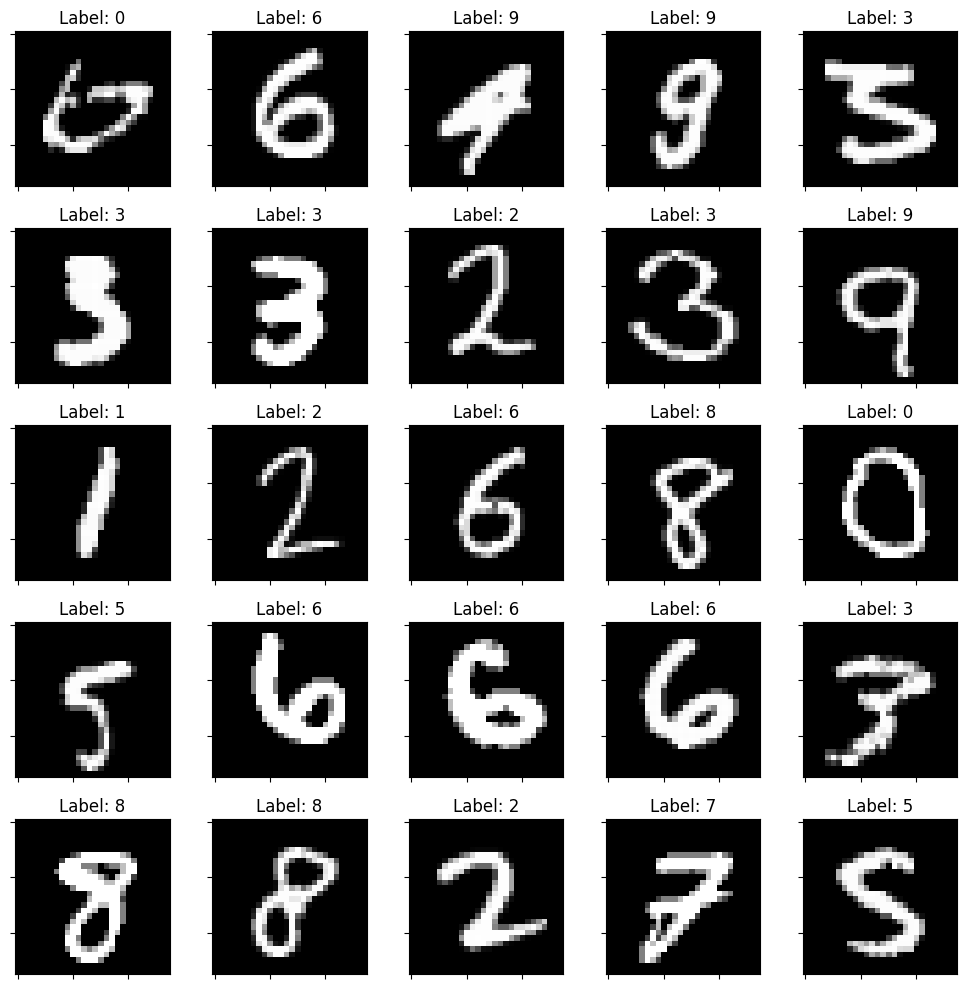

In [17]:
startIndex = 445
num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(25):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(xTestImg[i+startIndex,:,:], cmap='gray')
    ax.set_title('Label: {}'.format(classLabel[i+startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.tight_layout()
plt.show()

So we can stil try some improvemnts in our model by adding one more layer or increase number of eepoch 

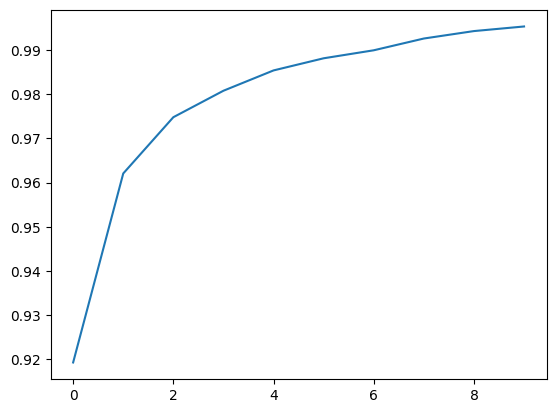

In [18]:
plt.plot(history.history['accuracy'])